# Lab 10: Fully Connected Neural Networks

In this assignment, we will learn fully connected neural network. 


## 1. Example

This assignement should be run on Google Colab where you can use free GPU to accelerate the computation. Please refer to our slides to set up GPU. 

### 1. Install Pytorch

In [2]:
!pip3 install torch torchvision   

Defaulting to user installation because normal site-packages is not writeable


### 2. Check GPU

In [4]:
!/opt/bin/nvidia-smi  #show GPU 

The system cannot find the path specified.


### 3. Mount to google drive (optional)

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 4. Code

In [3]:
#Import Libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [17]:
args={}
args['batch_size']=100
args['test_batch_size']=100
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['log_interval']=10

In [6]:
# build an mlp
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256,128)  # linear layer (256 -> 128)
        self.fc3 = nn.Linear(128,10)  # linear layer (128 -> 10)

    def forward(self, x):
        h0 = x.view(-1,28*28) #input layer
        h1 = F.relu(self.fc1(h0)) # hidden layer 1
        h2 = F.relu(self.fc2(h1)) # hidden layer 2
        h3 = self.fc3(h2) # output layer

        return h3

model = Net()
# model.cuda() # put the model on GPU
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

In [5]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=False)

In [18]:
train_loss = []
def train(epoch):
    model.train()
    current_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = data.cuda(), target.cuda()
        
        output = model(data)
        loss = criterion(output, target)

        # compute gradients
        optimizer.zero_grad()
        loss.backward()

        #to do a one-step update on our parameter.
        optimizer.step()

        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            current_loss.append(loss.item())
            
    train_loss.append(round(sum(current_loss)/len(current_loss),3))

In [25]:
test_accuracy = []
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:

        output = model(data)
        test_loss += criterion(output, target).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] 
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_accuracy.append(100. * correct / len(test_loader.dataset))

In [16]:
for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.334668
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.385855
Train Epoch: 1 [2000/60000 (3%)]	Loss: 0.284365
Train Epoch: 1 [3000/60000 (5%)]	Loss: 0.308693
Train Epoch: 1 [4000/60000 (7%)]	Loss: 0.441755
Train Epoch: 1 [5000/60000 (8%)]	Loss: 0.260958
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.358047
Train Epoch: 1 [7000/60000 (12%)]	Loss: 0.409134
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.290523
Train Epoch: 1 [9000/60000 (15%)]	Loss: 0.480855
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.408252
Train Epoch: 1 [11000/60000 (18%)]	Loss: 0.391619
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.227692
Train Epoch: 1 [13000/60000 (22%)]	Loss: 0.206207
Train Epoch: 1 [14000/60000 (23%)]	Loss: 0.272085
Train Epoch: 1 [15000/60000 (25%)]	Loss: 0.280203
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.189398
Train Epoch: 1 [17000/60000 (28%)]	Loss: 0.320948
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.511389
Train Epoch: 1 [19000/60000 (32%)]	Loss: 0.298568
Train Epoch: 1 [200

Train Epoch: 3 [44000/60000 (73%)]	Loss: 0.245142
Train Epoch: 3 [45000/60000 (75%)]	Loss: 0.234927
Train Epoch: 3 [46000/60000 (77%)]	Loss: 0.172912
Train Epoch: 3 [47000/60000 (78%)]	Loss: 0.149292
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.158723
Train Epoch: 3 [49000/60000 (82%)]	Loss: 0.258296
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.241300
Train Epoch: 3 [51000/60000 (85%)]	Loss: 0.193416
Train Epoch: 3 [52000/60000 (87%)]	Loss: 0.200687
Train Epoch: 3 [53000/60000 (88%)]	Loss: 0.275404
Train Epoch: 3 [54000/60000 (90%)]	Loss: 0.258809
Train Epoch: 3 [55000/60000 (92%)]	Loss: 0.196466
Train Epoch: 3 [56000/60000 (93%)]	Loss: 0.279362
Train Epoch: 3 [57000/60000 (95%)]	Loss: 0.302207
Train Epoch: 3 [58000/60000 (97%)]	Loss: 0.146268
Train Epoch: 3 [59000/60000 (98%)]	Loss: 0.261572

Test set: Average loss: 0.0022, Accuracy: 9372/10000 (94%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.404196
Train Epoch: 4 [1000/60000 (2%)]	Loss: 0.197011
Train Epoch: 4 [2000/60000 (3%)]	Loss: 0.19729

Train Epoch: 6 [26000/60000 (43%)]	Loss: 0.159046
Train Epoch: 6 [27000/60000 (45%)]	Loss: 0.214878
Train Epoch: 6 [28000/60000 (47%)]	Loss: 0.253207
Train Epoch: 6 [29000/60000 (48%)]	Loss: 0.129557
Train Epoch: 6 [30000/60000 (50%)]	Loss: 0.366364
Train Epoch: 6 [31000/60000 (52%)]	Loss: 0.102216
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.126019
Train Epoch: 6 [33000/60000 (55%)]	Loss: 0.169397
Train Epoch: 6 [34000/60000 (57%)]	Loss: 0.172857
Train Epoch: 6 [35000/60000 (58%)]	Loss: 0.146989
Train Epoch: 6 [36000/60000 (60%)]	Loss: 0.169639
Train Epoch: 6 [37000/60000 (62%)]	Loss: 0.199621
Train Epoch: 6 [38000/60000 (63%)]	Loss: 0.116644
Train Epoch: 6 [39000/60000 (65%)]	Loss: 0.144138
Train Epoch: 6 [40000/60000 (67%)]	Loss: 0.083508
Train Epoch: 6 [41000/60000 (68%)]	Loss: 0.219014
Train Epoch: 6 [42000/60000 (70%)]	Loss: 0.173416
Train Epoch: 6 [43000/60000 (72%)]	Loss: 0.136547
Train Epoch: 6 [44000/60000 (73%)]	Loss: 0.108457
Train Epoch: 6 [45000/60000 (75%)]	Loss: 0.193215


Train Epoch: 9 [8000/60000 (13%)]	Loss: 0.225919
Train Epoch: 9 [9000/60000 (15%)]	Loss: 0.166088
Train Epoch: 9 [10000/60000 (17%)]	Loss: 0.120247
Train Epoch: 9 [11000/60000 (18%)]	Loss: 0.202691
Train Epoch: 9 [12000/60000 (20%)]	Loss: 0.121074
Train Epoch: 9 [13000/60000 (22%)]	Loss: 0.142469
Train Epoch: 9 [14000/60000 (23%)]	Loss: 0.118383
Train Epoch: 9 [15000/60000 (25%)]	Loss: 0.180694
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.069485
Train Epoch: 9 [17000/60000 (28%)]	Loss: 0.158479
Train Epoch: 9 [18000/60000 (30%)]	Loss: 0.125577
Train Epoch: 9 [19000/60000 (32%)]	Loss: 0.236222
Train Epoch: 9 [20000/60000 (33%)]	Loss: 0.083031
Train Epoch: 9 [21000/60000 (35%)]	Loss: 0.095719
Train Epoch: 9 [22000/60000 (37%)]	Loss: 0.113379
Train Epoch: 9 [23000/60000 (38%)]	Loss: 0.268863
Train Epoch: 9 [24000/60000 (40%)]	Loss: 0.103557
Train Epoch: 9 [25000/60000 (42%)]	Loss: 0.132844
Train Epoch: 9 [26000/60000 (43%)]	Loss: 0.201574
Train Epoch: 9 [27000/60000 (45%)]	Loss: 0.098328
Tr

## 2. Tasks

### 1. Please use other activation functions, e.g., sigmoid, tanh, and then plot the training loss and testing accuracy. 

When plotting the training loss, the x-axis is iteration and the y-axis is training loss. When plotting the testing accuracy,  the x-axis is epoch and the y-axis is the training loss.

In [26]:
# your code
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256,128)  # linear layer (256 -> 128)
        self.fc3 = nn.Linear(128,10)  # linear layer (128 -> 10)

    def forward(self, x):
        h0 = x.view(-1,28*28) #input layer
        h1 = F.sigmoid(self.fc1(h0)) # hidden layer 1
        h2 = F.sigmoid(self.fc2(h1)) # hidden layer 2
        h3 = self.fc3(h2) # output layer

        return h3

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [27]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

In [28]:
for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311014
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.288717
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.298548
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.307339
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.296296
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.302557
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.309704
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.297673
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.296843
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.304183
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.313393
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.297757
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.297694
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.294412
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.290291
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.295979
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.282991
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.295503
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.293538
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.287744
Train Epoch: 1 [200

Train Epoch: 3 [44000/60000 (73%)]	Loss: 2.031207
Train Epoch: 3 [45000/60000 (75%)]	Loss: 2.007073
Train Epoch: 3 [46000/60000 (77%)]	Loss: 2.033184
Train Epoch: 3 [47000/60000 (78%)]	Loss: 2.049521
Train Epoch: 3 [48000/60000 (80%)]	Loss: 2.013938
Train Epoch: 3 [49000/60000 (82%)]	Loss: 2.035574
Train Epoch: 3 [50000/60000 (83%)]	Loss: 2.027288
Train Epoch: 3 [51000/60000 (85%)]	Loss: 1.974192
Train Epoch: 3 [52000/60000 (87%)]	Loss: 1.984006
Train Epoch: 3 [53000/60000 (88%)]	Loss: 1.980496
Train Epoch: 3 [54000/60000 (90%)]	Loss: 1.983635
Train Epoch: 3 [55000/60000 (92%)]	Loss: 1.997782
Train Epoch: 3 [56000/60000 (93%)]	Loss: 1.961761
Train Epoch: 3 [57000/60000 (95%)]	Loss: 2.018911
Train Epoch: 3 [58000/60000 (97%)]	Loss: 1.928919
Train Epoch: 3 [59000/60000 (98%)]	Loss: 1.934518

Test set: Average loss: 0.0194, Accuracy: 5830/10000 (58%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.926274
Train Epoch: 4 [1000/60000 (2%)]	Loss: 1.992161
Train Epoch: 4 [2000/60000 (3%)]	Loss: 1.88890

Train Epoch: 6 [26000/60000 (43%)]	Loss: 1.164435
Train Epoch: 6 [27000/60000 (45%)]	Loss: 1.082402
Train Epoch: 6 [28000/60000 (47%)]	Loss: 1.023259
Train Epoch: 6 [29000/60000 (48%)]	Loss: 1.019156
Train Epoch: 6 [30000/60000 (50%)]	Loss: 1.014498
Train Epoch: 6 [31000/60000 (52%)]	Loss: 1.061933
Train Epoch: 6 [32000/60000 (53%)]	Loss: 1.085538
Train Epoch: 6 [33000/60000 (55%)]	Loss: 0.980537
Train Epoch: 6 [34000/60000 (57%)]	Loss: 1.117981
Train Epoch: 6 [35000/60000 (58%)]	Loss: 1.084233
Train Epoch: 6 [36000/60000 (60%)]	Loss: 0.908449
Train Epoch: 6 [37000/60000 (62%)]	Loss: 0.985482
Train Epoch: 6 [38000/60000 (63%)]	Loss: 0.958805
Train Epoch: 6 [39000/60000 (65%)]	Loss: 0.994790
Train Epoch: 6 [40000/60000 (67%)]	Loss: 0.983196
Train Epoch: 6 [41000/60000 (68%)]	Loss: 1.111468
Train Epoch: 6 [42000/60000 (70%)]	Loss: 1.118798
Train Epoch: 6 [43000/60000 (72%)]	Loss: 1.000019
Train Epoch: 6 [44000/60000 (73%)]	Loss: 1.041752
Train Epoch: 6 [45000/60000 (75%)]	Loss: 1.098199


Train Epoch: 9 [8000/60000 (13%)]	Loss: 0.748167
Train Epoch: 9 [9000/60000 (15%)]	Loss: 0.825988
Train Epoch: 9 [10000/60000 (17%)]	Loss: 0.768322
Train Epoch: 9 [11000/60000 (18%)]	Loss: 0.686419
Train Epoch: 9 [12000/60000 (20%)]	Loss: 0.509728
Train Epoch: 9 [13000/60000 (22%)]	Loss: 0.706543
Train Epoch: 9 [14000/60000 (23%)]	Loss: 0.742840
Train Epoch: 9 [15000/60000 (25%)]	Loss: 0.726945
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.720634
Train Epoch: 9 [17000/60000 (28%)]	Loss: 0.648166
Train Epoch: 9 [18000/60000 (30%)]	Loss: 0.700827
Train Epoch: 9 [19000/60000 (32%)]	Loss: 0.643475
Train Epoch: 9 [20000/60000 (33%)]	Loss: 0.705775
Train Epoch: 9 [21000/60000 (35%)]	Loss: 0.813674
Train Epoch: 9 [22000/60000 (37%)]	Loss: 0.620781
Train Epoch: 9 [23000/60000 (38%)]	Loss: 0.691811
Train Epoch: 9 [24000/60000 (40%)]	Loss: 0.641111
Train Epoch: 9 [25000/60000 (42%)]	Loss: 0.539294
Train Epoch: 9 [26000/60000 (43%)]	Loss: 0.588949
Train Epoch: 9 [27000/60000 (45%)]	Loss: 0.684701
Tr

In [42]:
print(train_loss)

print(test_accuracy)

[2.286, 2.231, 2.104, 1.788, 1.404, 1.117, 0.923, 0.797, 0.696, 0.645, 2.283, 2.226, 2.083, 1.739, 1.341, 1.052, 0.884, 0.74, 0.664, 0.596]
[44.31999969482422, 45.02000045776367, 58.29999923706055, 64.83000183105469, 70.5, 77.05000305175781, 79.87999725341797, 82.41999816894531, 84.02999877929688, 85.33000183105469]


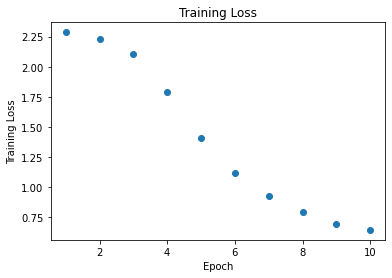

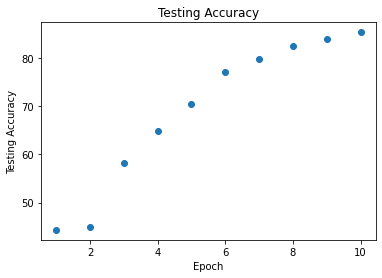

In [43]:
import matplotlib.pyplot as plt

plt.scatter(range(1,11), [2.286, 2.231, 2.104, 1.788, 1.404, 1.117, 0.923, 0.797, 0.696, 0.645])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')
plt.show()

plt.scatter(range(1,11), [44.31999969482422, 45.02000045776367, 58.29999923706055, 64.83000183105469, 70.5, 77.05000305175781, 79.87999725341797, 82.41999816894531, 84.02999877929688, 85.33000183105469])
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy')
plt.show()

### 2. Please use different layers in the model, e.g., 1 layer, 5 layers, 10 layers,  and then plot the training loss and testing accuracy.

In [55]:
# your code
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 256)   # linear layer (784 -> 256)
        self.fc2 = nn.Linear(256,216)  # linear layer (256 -> 200)
        self.fc3 = nn.Linear(216,128)  # linear layer (200 -> 128)
        self.fc4 = nn.Linear(128,64)  # linear layer (128 -> 64)
        self.fc5 = nn.Linear(64, 10) # linear layer (64 -> 10)

    def forward(self, x):
        h0 = x.view(-1,28*28) #input layer
        h1 = F.sigmoid(self.fc1(h0)) # hidden layer 1
        h2 = F.sigmoid(self.fc2(h1)) # hidden layer 2
        h3 = F.sigmoid(self.fc3(h2)) # hidden layer 3
        h4 = F.sigmoid(self.fc4(h3)) # hidden layer 4
        h5 = self.fc5(h4) # output layer

        return h5

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=216, bias=True)
  (fc3): Linear(in_features=216, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)


In [56]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

In [57]:
for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.377497
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.288488
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.298018
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.317481
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.311059
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.303951
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.313884
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.314320
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.304551
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.303098
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.301235
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.298021
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.304135
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.302186
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.304305
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.294995
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.306664
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.300671
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.300730
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.306526
Train Epoch: 1 [200

Train Epoch: 3 [44000/60000 (73%)]	Loss: 2.296904
Train Epoch: 3 [45000/60000 (75%)]	Loss: 2.296738
Train Epoch: 3 [46000/60000 (77%)]	Loss: 2.300568
Train Epoch: 3 [47000/60000 (78%)]	Loss: 2.306772
Train Epoch: 3 [48000/60000 (80%)]	Loss: 2.302821
Train Epoch: 3 [49000/60000 (82%)]	Loss: 2.305178
Train Epoch: 3 [50000/60000 (83%)]	Loss: 2.305234
Train Epoch: 3 [51000/60000 (85%)]	Loss: 2.299490
Train Epoch: 3 [52000/60000 (87%)]	Loss: 2.298358
Train Epoch: 3 [53000/60000 (88%)]	Loss: 2.305990
Train Epoch: 3 [54000/60000 (90%)]	Loss: 2.300494
Train Epoch: 3 [55000/60000 (92%)]	Loss: 2.295675
Train Epoch: 3 [56000/60000 (93%)]	Loss: 2.300489
Train Epoch: 3 [57000/60000 (95%)]	Loss: 2.312628
Train Epoch: 3 [58000/60000 (97%)]	Loss: 2.309639
Train Epoch: 3 [59000/60000 (98%)]	Loss: 2.307898

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.298992
Train Epoch: 4 [1000/60000 (2%)]	Loss: 2.306995
Train Epoch: 4 [2000/60000 (3%)]	Loss: 2.30306

Train Epoch: 6 [26000/60000 (43%)]	Loss: 2.301030
Train Epoch: 6 [27000/60000 (45%)]	Loss: 2.298696
Train Epoch: 6 [28000/60000 (47%)]	Loss: 2.317920
Train Epoch: 6 [29000/60000 (48%)]	Loss: 2.309397
Train Epoch: 6 [30000/60000 (50%)]	Loss: 2.291991
Train Epoch: 6 [31000/60000 (52%)]	Loss: 2.304788
Train Epoch: 6 [32000/60000 (53%)]	Loss: 2.297425
Train Epoch: 6 [33000/60000 (55%)]	Loss: 2.305255
Train Epoch: 6 [34000/60000 (57%)]	Loss: 2.311018
Train Epoch: 6 [35000/60000 (58%)]	Loss: 2.304561
Train Epoch: 6 [36000/60000 (60%)]	Loss: 2.298078
Train Epoch: 6 [37000/60000 (62%)]	Loss: 2.293980
Train Epoch: 6 [38000/60000 (63%)]	Loss: 2.304235
Train Epoch: 6 [39000/60000 (65%)]	Loss: 2.306103
Train Epoch: 6 [40000/60000 (67%)]	Loss: 2.300058
Train Epoch: 6 [41000/60000 (68%)]	Loss: 2.300860
Train Epoch: 6 [42000/60000 (70%)]	Loss: 2.288899
Train Epoch: 6 [43000/60000 (72%)]	Loss: 2.299481
Train Epoch: 6 [44000/60000 (73%)]	Loss: 2.304956
Train Epoch: 6 [45000/60000 (75%)]	Loss: 2.294292


Train Epoch: 9 [8000/60000 (13%)]	Loss: 2.310496
Train Epoch: 9 [9000/60000 (15%)]	Loss: 2.302492
Train Epoch: 9 [10000/60000 (17%)]	Loss: 2.288744
Train Epoch: 9 [11000/60000 (18%)]	Loss: 2.294203
Train Epoch: 9 [12000/60000 (20%)]	Loss: 2.305658
Train Epoch: 9 [13000/60000 (22%)]	Loss: 2.303189
Train Epoch: 9 [14000/60000 (23%)]	Loss: 2.294772
Train Epoch: 9 [15000/60000 (25%)]	Loss: 2.300145
Train Epoch: 9 [16000/60000 (27%)]	Loss: 2.307097
Train Epoch: 9 [17000/60000 (28%)]	Loss: 2.296673
Train Epoch: 9 [18000/60000 (30%)]	Loss: 2.297498
Train Epoch: 9 [19000/60000 (32%)]	Loss: 2.303874
Train Epoch: 9 [20000/60000 (33%)]	Loss: 2.305092
Train Epoch: 9 [21000/60000 (35%)]	Loss: 2.306346
Train Epoch: 9 [22000/60000 (37%)]	Loss: 2.297853
Train Epoch: 9 [23000/60000 (38%)]	Loss: 2.299337
Train Epoch: 9 [24000/60000 (40%)]	Loss: 2.298902
Train Epoch: 9 [25000/60000 (42%)]	Loss: 2.300712
Train Epoch: 9 [26000/60000 (43%)]	Loss: 2.305235
Train Epoch: 9 [27000/60000 (45%)]	Loss: 2.305779
Tr